![example](images/director_shot.jpeg)

# Microsoft Film Studio Analysis

**Authors:** Nicolas Pierce, Ashli Dougherty, Ian Butler

***
## Overview

This research seeks to answer the question: what films should Microsoft's new film studio make? We utilize data from three primary movie information websites: IMDb, Box Office Mojo, and The Numbers. We aggregate these sources into useable data frames and visualize the features we engineer from them: genres versus ratings, genres versus domestic gross, and genres versus return on investment. Finally, we deliver the results of our research and make confident recommendations: Microsoft's new studio should make either Action/Adventure films or Horror/Mystery/Thriller films, depending on their budget and timeframe.

***
## Business Problem

Microsoft is creating a new movie studio. Our research is designed to answer the following question:
- What kinds of movies should Microsoft's new movie studio be making?
***
The primary questions we are considering are:
* Which genres of movies do audiences like?
* Is there a relationship between ratings and revenue?
* Which genres of movies have the highest domestic gross revenue?
* Which genres of movies have the highest return on investment?
* Are the highest grossing genres also the highest ROI genres?

***
## Data Understanding

The data we are using comes from three sources:
* IMDb
* Box Office Mojo
* The Numbers
***
These websites are primary sources for aggregated data concerning film characteristics and performance.<br>These are the raw data categories we accessed from each source:
* From IMDb, we accessed movie basics and movie ratings.
* From Box Office Mojo, we accessed movie gross revenue.
* From The Numbers, we accessed movie budgets.
***

# Setting Up Packages and Connections
***

The below cell imports standard packages and also unzips the currently zipped IMDB dataset into ./zippedData

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# from Kevin Rivera
from zipfile import ZipFile
# specifying the zip file name
file_name = "./zippedData/im.db.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    # extract data to the same directory as the other data
    zip.extractall(path='./zippedData')
    print('Done!')

%matplotlib inline

File Name                                             Modified             Size
im.db                                          2021-12-20 16:31:38    169443328
Extracting all the files now...
Done!


The cell below creates a connection to the SQL database and a cursor to navigate it.

In [2]:
conn = sqlite3.Connection('./zippedData/im.db')
cursor = conn.cursor()

The cell below creates a test query for the database.

In [3]:
testq = """

select
    *
from
    movie_basics

"""

The cells below create a test data frame and render it, to confirm a successful connection.

In [4]:
testq_results = pd.read_sql(testq, conn)

In [5]:
testq_results.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# Exploration of Movie Ratings and Genres

### Author: Nic Pierce

After looking through data, The best soucre to explore rating and genre relation through was through the imdb file.
First we created a dictionary to house genres as keys and their average ratings as values.

In [6]:
genreDict = {}


Next a table containing the necessary information was created by joining the movie_ratings table with the movie_basics table on their common movie_id collumn.

In [7]:
t = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id


ORDER BY avgRating DESC

;


'''

t = pd.read_sql(t, conn)
t.head()

,id,avgRating,title,genres
0,tt5390098,10.0,The Paternal Bond: Barbary Macaques,Documentary
1,tt6295832,10.0,Requiem voor een Boom,Documentary
2,tt1770682,10.0,Freeing Bernie Baran,"Crime,Documentary"
3,tt2632430,10.0,Hercule contre Hermès,Documentary
4,tt8730716,10.0,Pick It Up! - Ska in the '90s,Documentary


Now that we have an overall table containing our data for this portion, genres and their average ratings were pulled and added to the genreDict dictionary created earlier.

The genres used were based off of standard main genres designated by wikipedia at https://en.wikipedia.org/wiki/Film_genre

In [8]:
docu = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Documentary%'

ORDER BY avgRating DESC

;


'''

docu = pd.read_sql(docu, conn)
documean = docu['avgRating'].mean()
genreDict['Documentary'] = documean


bio = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Biography%'

ORDER BY avgRating DESC

;


'''

bio = pd.read_sql(bio, conn)
biomean = bio['avgRating'].mean()
genreDict['Biography'] = biomean


music = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Music%'

ORDER BY avgRating DESC

;


'''

music = pd.read_sql(music, conn)
musicmean = music['avgRating'].mean()
genreDict['Music'] = musicmean


drama = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Drama%'

ORDER BY avgRating DESC

;


'''

drama = pd.read_sql(drama, conn)
dramamean = drama['avgRating'].mean()
genreDict['Drama'] = dramamean


family = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Family%'

ORDER BY avgRating DESC

;


'''

family = pd.read_sql(family, conn)
familymean = family['avgRating'].mean()
genreDict['Family'] = familymean


ani = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Animation%'

ORDER BY avgRating DESC

;


'''

ani = pd.read_sql(ani, conn)
animean = ani['avgRating'].mean()
genreDict['Animation'] = animean


adv = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Adventure%'

ORDER BY avgRating DESC

;


'''

adv = pd.read_sql(adv, conn)
advmean = adv['avgRating'].mean()
genreDict['Adventure'] = advmean


rom = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Romance%'

ORDER BY avgRating DESC

;


'''

rom = pd.read_sql(rom, conn)
rommean = rom['avgRating'].mean()
genreDict['Romance'] = rommean


com = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Comedy%'

ORDER BY avgRating DESC

;


'''

com = pd.read_sql(com, conn)
commean = com['avgRating'].mean()
genreDict['Comedy'] = commean


mys = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Mystery%'

ORDER BY avgRating DESC

;


'''

mys = pd.read_sql(mys, conn)
mysmean = mys['avgRating'].mean()
genreDict['Mystery'] = mysmean


fant = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Fantasy%'

ORDER BY avgRating DESC

;


'''

fant = pd.read_sql(fant, conn)
fantmean = fant['avgRating'].mean()
genreDict['Fantasy'] = fantmean


action = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Action%'

ORDER BY avgRating DESC

;


'''

action = pd.read_sql(action, conn)
actionmean = action['avgRating'].mean()
genreDict['Action'] = actionmean


thriller = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Thriller%'

ORDER BY avgRating DESC

;


'''

thriller = pd.read_sql(thriller, conn)
thrillermean = thriller['avgRating'].mean()
genreDict['Thriller'] = thrillermean

sci = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Sci-Fi%'

ORDER BY avgRating DESC

;


'''

sci = pd.read_sql(sci, conn)
scimean = sci['avgRating'].mean()
genreDict['Sci_fi'] = scimean


horror = '''
SELECT
    movie_ratings.movie_id AS id,
    movie_ratings.averagerating AS avgRating,
    movie_basics.primary_title AS title,
    movie_basics.genres AS genres
FROM
    movie_ratings
INNER JOIN movie_basics ON movie_ratings.movie_id=movie_basics.movie_id

WHERE
    genres LIKE '%Horror%'

ORDER BY avgRating DESC

;


'''

horror = pd.read_sql(horror, conn)
horrormean = horror['avgRating'].mean()
genreDict['Horror'] = horrormean

Next, we wanted to sort our dictionary in descending order so we could more easily identify where each genre fell compared to it's counterparts.

In [9]:
g = sorted(genreDict.items(), key=lambda x:x[1], reverse=True)
genreDictSorted = dict(g)


Now that the genres and their associated average ratings have been pulled and added to the genreDict dictionary, we can create a list of genres from our genreDict keys as well as a second list of their corresponding values in preparation for visualization.

In [10]:
genres = list(genreDictSorted.keys())
ratings = list(genreDictSorted.values())


With our dictionary sorted and our lists created, we now have our x and y values ready to plot in a graph to help us better see and understand the results.

In [11]:
#Dictionary credited to Ashli
avg_main_genre_gross = {
    
    'Action': 8.749614e+07,
    'Adventure': 1.148395e+08,
    'Animation': 1.128608e+08,
    'Biography': 2.854831e+07,
    'Comedy': 4.654518e+07,
    'Documentary': 3270702.98,
    'Drama':  2.327981e+07,
    'Family': 6.359999e+07, 
    'Fantasy': 6.933615e+07,
    'Horror': 3.157331e+07,
    'Music': 3.052755e+07,
    'Mystery': 3.378377e+07,
    'Romance': 2.223531e+07,
    'Sci-Fi': 1.390575e+08,
    'Thriller': 4.333931e+07,
    
}





1,390,575,00.000000
grossList = [3270702.98, 2.854831e+07, 3.052755e+07, 2.327981e+07, 6.359999e+07, 1.128608e+08, 
            1.148395e+08, 2.223531e+07, 4.654518e+07, 3.378377e+07, 6.933615e+07, 8.749614e+07,
            4.333931e+07, 1.390575e+08, 3.157331e+07]


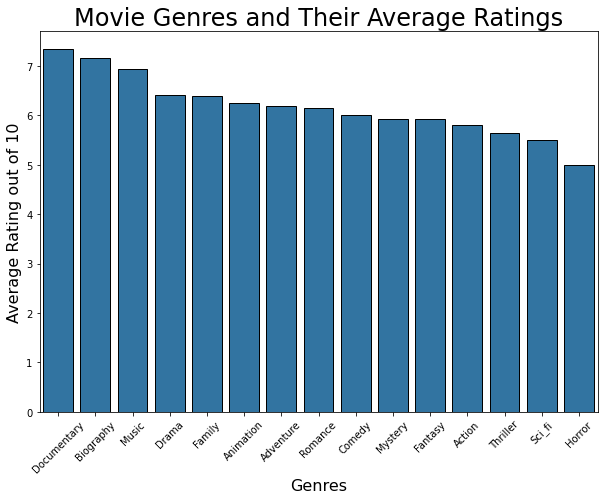

In [12]:
g = sns.barplot(x=genres, y=ratings,color='tab:blue', edgecolor='black');
g.figure.set_size_inches(10,7);
g.axes.set_title('Movie Genres and Their Average Ratings', fontsize=24);
plt.xticks(rotation=45);
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Average Rating out of 10', fontsize=16);

/Users/ashlidougherty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-13-0ed001bea08b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  gr_df.set_yticklabels([' ','$0','$20', '$40', '$60', '$80', '$100', '$120', '$140'])


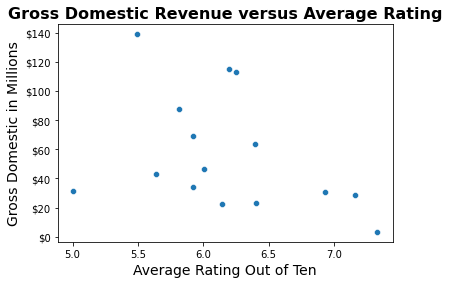

In [13]:
gr_df = sns.scatterplot(ratings, grossList);

gr_df.set_ylabel('Gross Domestic in Millions', fontsize=14)
gr_df.set_xlabel('Average Rating Out of Ten', fontsize=14)
#gr_df.ticklabel_format(style='plain', axis = 'y', )
gr_df.set_yticklabels([' ','$0','$20', '$40', '$60', '$80', '$100', '$120', '$140'])
gr_df.set_title('Gross Domestic Revenue versus Average Rating', weight='bold', fontsize = 16)
co = np.corrcoef(grossList, ratings,)



In [14]:
print(f' The correlation coefficient between average genre ratings and average genre gross profit is {co[0][1]}.')

 The correlation coefficient between average genre ratings and average genre gross profit is -0.3888113168555871.


After looking at the graph above, we thought it would be interesting to see the correlation between movie rating and gross profit, and we can see that there in near no relation.

## Evaluation
From what we've gathered above, we can see that Documentaries, Biographies, and Music movies tend to recieve the best ratings, while Horror, Sci-Fi, and Thriller films recieve poorer ratings. While people often use these ratings to form an opinion as to whether or not they will see a movie, we will dive into how heavily ratings may or may not effect the overall profitability of a film.

# Exploring how genre affects domestic gross revenue

### Author: Ashli Dougherty

## Average Gross Domestic Revenue by Genre

### Preparing Data for Domestic Gross and Genres

We wanted to show which type of movies were generating the most box office revenue. We examined domestic gross box office returns from US movies between the years of 2010 and 2018. Data is from Box Office Mojo: https://www.boxofficemojo.com/?ref_=bo_nb_cso_mojologo.

Loading data frame to examine movie title, domestic gross, and foreign gross.

In [15]:
bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [16]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Upon exploration we saw that there were null values in both gross columns. 

In [17]:
print(bom_df['foreign_gross'].isna().sum())
print(bom_df['domestic_gross'].isna().sum())

1350
28


We chose to focus just on domestic gross values as there are 1350 null values for foreign gross compared to only 28 null values for domestic gross. We then had to decide what action to take for the null vales in domestic gross.

In [18]:
bom_df['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

Null values were dropped for the following reasons: 
- Due to the large difference between the minimum (100) and the max (9 million) values for domestic gross as inserting either the mean or mediuan could skew over all averages.
- Null values only represent less than 1% of all entries. 

Final table filtered to only show title and domestic gross revenue. 

In [19]:
bom_domestic_df = bom_df.loc[: , ['title','domestic_gross']]
bom_domestic_df_clean = bom_domestic_df.dropna(subset =['domestic_gross'])
bom_domestic_df_clean.sort_values(by='domestic_gross', ascending = False).head()

,title,domestic_gross
1872,Star Wars: The Force Awakens,936700000.0
3080,Black Panther,700100000.0
3079,Avengers: Infinity War,678800000.0
1873,Jurassic World,652300000.0
727,Marvel's The Avengers,623400000.0


New data frame was created using IMBD SQL data base that would include both the title and genres. Based on the titles from the Box Office Mojo table we decided to include films from the US region only. 

In [20]:
basics_q = """

SELECT
    DISTINCT mb.primary_title as title,
    mb.genres,
    ma.region

FROM
    movie_basics as mb
        INNER JOIN movie_akas as ma
            ON mb.movie_id = ma.movie_id

WHERE
    ma.region = 'US'

GROUP BY
    mb.genres,
    title

"""

mv_basics = pd.read_sql(basics_q, conn)
mv_basics.head()

,title,genres,region
0,#humbled,None,US
1,$MOKE,None,US
2,&,None,US
3,10 Days in Daytona: Bike Week 2012,None,US
4,1000 Waves to Surfing Glory,None,US


In [21]:
mv_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47143 entries, 0 to 47142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   47143 non-null  object
 1   genres  46552 non-null  object
 2   region  47143 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


Checked for duplicate titles and decided to drop them for the following reasons: 
- It was not possible to search if each duplicate title was a differnt movie based on sheer numbers of entries.
- Duplicate titles only representative of 7% of the data

In [22]:
mv_basics['title'].duplicated(keep =False).value_counts()

False    43865
True      3278
Name: title, dtype: int64

In [23]:
mv_basics_dropped = mv_basics[(mv_basics['title'].duplicated(keep =False)) == False]
mv_basics_dropped.head()

,title,genres,region
0,#humbled,None,US
1,$MOKE,None,US
2,&,None,US
3,10 Days in Daytona: Bike Week 2012,None,US
4,1000 Waves to Surfing Glory,None,US


In [24]:
mv_basics_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43865 entries, 0 to 47142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   43865 non-null  object
 1   genres  43322 non-null  object
 2   region  43865 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [25]:
mv_basics_dropped['genres'].isna().sum()

543

Checked for null data and saw that there were 543 missing values. These were also dropped becuase having an "Unknown" genre would not help in answering our question of which specific genres produce revenue.

### Merged Data frames
IMDB data that contained title and genre was merged with Box Office Mojo Data frame that contained title and domestic gross. These tables were joined on movie title, so only common titles were kept for analysis. 

In [26]:
genre_domgross = mv_basics_dropped.merge(bom_domestic_df_clean, how='inner', on='title')
genre_domgross.head()

,title,genres,region,domestic_gross
0,Mountain,None,US,365000.0
1,The Man with the Iron Fists,Action,US,15600000.0
2,War of the Arrows,Action,US,251000.0
3,Falcon Rising,"Action,Adventure",US,11800.0
4,Ragnarok,"Action,Adventure",US,1400.0


In [27]:
genre_domgross['genres'].isna().sum()

1

Once again null values for genres was dropped using same earlier arguments.

In [28]:
genre_domgross_clean = genre_domgross.dropna(subset=['genres'])
genre_domgross_clean.head()

,title,genres,region,domestic_gross
1,The Man with the Iron Fists,Action,US,15600000.0
2,War of the Arrows,Action,US,251000.0
3,Falcon Rising,"Action,Adventure",US,11800.0
4,Ragnarok,"Action,Adventure",US,1400.0
5,Big Hero 6,"Action,Adventure,Animation",US,222500000.0


## Combining genres and finding average domestic gross for each "main" genre.

Now that all relevant data was in one table, movies could be grouped by genre/subgenres. The next step was to determine how to group the movies that had more than one genre in to a "main" genre. What would be considered a main movie genre was taken from: https://en.wikipedia.org/wiki/Film_genre and include: 
**Action, Adventure, Animation, Biography, Comedy, Documentary, Drama, Family, Fantasy, Horror, Music, Mystery, Romance, Sci-Fi, and Thriller.** 
These are also the same genres that were considered when we explored the ratings and genres data.

The data frame was filtered to pull any movie that contained the genre name and calculate the mean for each main genre. 

In [29]:
action = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Action')]
action.mean()
adventure = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Adventure')]
adventure.mean()
animation = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Animation')]
animation.mean()
biography = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Biography')]
biography.mean()
comedy = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Comedy')]
comedy.mean()
documentary = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Documentary')]
documentary.mean()
drama = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Drama')]
drama.mean()
family = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Family')]
family.mean()
fantasy = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Fantasy')]
fantasy.mean()
horror = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Horror')]
horror.mean()
music = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Music')]
music.mean()
mystery = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Mystery')]
mystery.mean()
romance = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Romance')]
romance.mean()
sci_fi = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Sci-Fi')]
sci_fi.mean()
thriller = genre_domgross_clean[genre_domgross_clean['genres'].str.contains('Thriller')]
thriller.mean()

domestic_gross    4.333931e+07
dtype: float64

From there a dictionary was built that has the main genre as keys and the average domestic gross as values. These would be used to build visualizations. 

In [30]:
avg_main_genre_gross = {
    'Documentary': 3270702.98,
    'Biography': 2.854831e+07,
    'Music': 3.052755e+07,
    'Drama':  2.327981e+07,
    'Family': 6.359999e+07, 
    'Animation': 1.128608e+08,
    'Adventure': 1.148395e+08,
    'Romance': 2.223531e+07,
    'Comedy': 4.654518e+07,
    'Mystery': 3.378377e+07,
    'Fantasy': 6.933615e+07,
    'Action': 8.749614e+07,
    'Thriller': 4.333931e+07,
    'Sci-Fi': 1.390575e+08,
    'Horror': 3.157331e+07
    
    
}
list(avg_main_genre_gross.keys())
list(avg_main_genre_gross.values())

[3270702.98,
 28548310.0,
 30527550.0,
 23279810.0,
 63599990.0,
 112860800.0,
 114839500.0,
 22235310.0,
 46545180.0,
 33783770.0,
 69336150.0,
 87496140.0,
 43339310.0,
 139057500.0,
 31573310.0]

## Data Modeling
### Average Domestic Gross by Genre

/Users/ashlidougherty/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-31-2e8bab850bba>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$0','$20', '$40', '$60', '$80', '$100', '$120', '$140'])


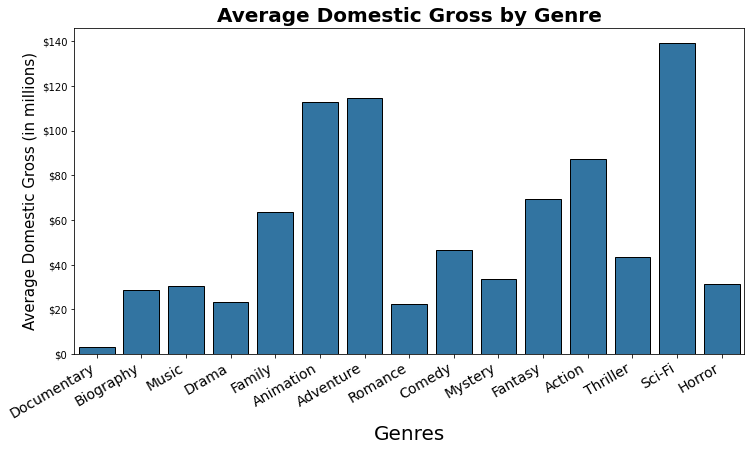

In [31]:
x = list(avg_main_genre_gross.keys())
y = list(avg_main_genre_gross.values())


plt.figure(figsize=(12,6))
ax = sns.barplot(x, y, color = 'tab:blue', edgecolor = 'black')
plt.title('Average Domestic Gross by Genre', fontsize =20, weight = 'bold')
plt.ylabel('Average Domestic Gross (in millions)', fontsize =15)
plt.xlabel('Genres', fontsize =20)
plt.xticks(fontsize=14, rotation=45, ha='right')

plt.ticklabel_format(style='plain', axis = 'y')
ax.set_yticklabels(['$0','$20', '$40', '$60', '$80', '$100', '$120', '$140'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

## Average Gross Domestic Revenue by Combined Genres
After examining the IMBD data base it was evident that most movies do not fall within a single genre. We wanted to investivate which combination of genres would create the highest domestic box office revenue. 

To do this we created a new data frame that consisted of just the top 40 highest grossing movies.

In [32]:
top_40_grossing = genre_domgross_clean.sort_values(by=['domestic_gross'], ascending=False).head(40)
top_40_grossing.head()

,title,genres,region,domestic_gross
126,Black Panther,"Action,Adventure,Sci-Fi",US,700100000.0
124,Avengers: Infinity War,"Action,Adventure,Sci-Fi",US,678800000.0
134,Jurassic World,"Action,Adventure,Sci-Fi",US,652300000.0
103,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",US,620200000.0
11,Incredibles 2,"Action,Adventure,Animation",US,608600000.0


The top grossing movies were then grouped by genres. 

In [33]:
combo_genre = top_40_grossing.groupby('genres').mean().sort_values(by='domestic_gross', ascending=False)
combo_genre.reset_index(inplace=True)
combo_genre.head()

,genres,domestic_gross
0,"Action,Adventure,Animation",608600000.0
1,"Action,Thriller",448100000.0
2,"Action,Adventure,Sci-Fi",438100000.0
3,"Action,Adventure,Fantasy",402700000.0
4,"Adventure,Animation,Comedy",385850000.0


In [34]:
combo_genre['genres'].value_counts()

Action,Thriller               1
Adventure,Animation,Comedy    1
Adventure,Drama,Fantasy       1
Action,Adventure,Thriller     1
Adventure,Family,Fantasy      1
Action,Adventure,Fantasy      1
Action,Adventure,Animation    1
Horror,Thriller               1
Action,Crime,Thriller         1
Action,Adventure,Comedy       1
Action,Biography,Drama        1
Action,Adventure,Sci-Fi       1
Name: genres, dtype: int64

It was noted that **all** of the top 40 movies were a combination of genres.

## Data Modeling
### Average Domestic Gross by Combined Genre

The graph below shows the combined genres of the top 40 grossing movies from the dataframe and their average domestic gross.

Of the 12 combinations of genres, the most common genres are **Action** and **Adventure** (both appearing in 67% of the combinations). The least common genres are **Horror, Crime** and **Biography** (both appearing only in 8% of the combinations). 

<ipython-input-35-a486b2f64f76>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$0','$100', '$200', '$300', '$400', '$500', '$600'])


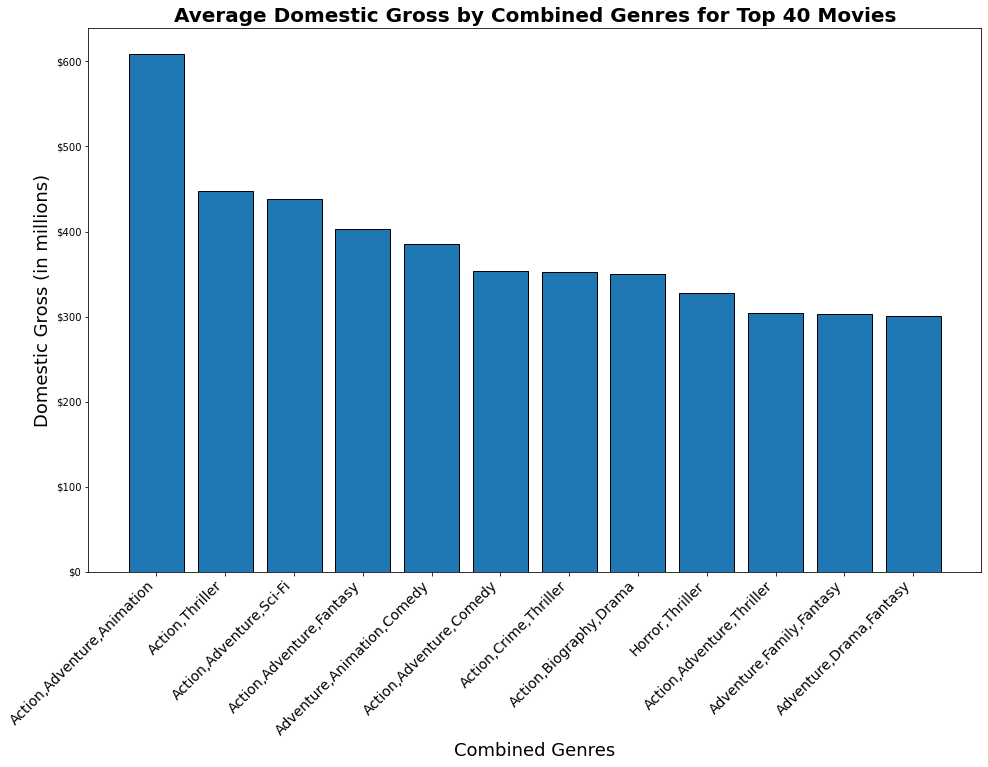

In [35]:
fig, ax = plt.subplots(figsize=(16,10))
x = combo_genre['genres']
y = combo_genre['domestic_gross']

ax.bar(x, y, color='tab:blue', edgecolor = 'black')
plt.xticks(fontsize=14, rotation=45, ha='right')
ax.set_yticklabels(['$0','$100', '$200', '$300', '$400', '$500', '$600'])
ax.set_title('Average Domestic Gross by Combined Genres for Top 40 Movies', fontsize='20', weight='bold')
ax.set_xlabel('Combined Genres', fontsize='18')
ax.set_ylabel('Domestic Gross (in millions)', fontsize='18');

## Average Gross Domestic Revenue by Genres Evalutations & Conclusions

Based on the data, the highest grossing main genres are **Sci-Fi, Adventure, Animation, Action, Fantasy**. 
***
However, studios produce movies that are labeled under several genres. When looking at the combined genres for the top grossing movies, the data shows that of the highest grossing films, 91% of them are classified as **Action** and/or **Adventure**. The only exception to this would be the movies that are classified as **Horror,Thriller**. 
***
If using this data to determine which types of movies to create, we would suggest **Action** and/or **Adventure** coupled with another other genre will increase the likelihood of a high domestic gross. 

# Exploration of Movie Gross and Production Budget - Return on Investment

### Author: Ian Butler

***
## Data Preparation

Instantiate a variable to run a SQL query on the entire movie_basics table.

In [36]:
imdb_movie_basics_query = """
select
    *
from
    movie_basics
"""

Instantiate a variable to create a pandas data frame on the movie_basics query.

In [37]:
movie_basics_df = pd.read_sql(imdb_movie_basics_query, conn)

Render the head of the movie_basics pandas data frame.

In [38]:
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Confirm the data type of the table.

In [39]:
type(movie_basics_df)

pandas.core.frame.DataFrame

Explore the movie_basics data frame.

In [40]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [41]:
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


Instantiate a variable to run a SQL query on the entire movie_ratings table.

In [42]:
imdb_movie_ratings_query = """
select
    *
from
    movie_ratings
"""

Instantiate a variable to create a pandas data frame on the movie_ratings table.

In [43]:
movie_ratings_df = pd.read_sql(imdb_movie_ratings_query, conn)

Render the head of the movie_ratings data frame.

In [44]:
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Confirm the data type of the table.

In [45]:
type(movie_ratings_df)

pandas.core.frame.DataFrame

Explore the movie_ratings data frame.

In [46]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [47]:
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Extract only the movies which have more than 282 reviews.<br>This decision is made in confidence as a result of the following domain knowledge:<br>any movie which has less than 282 reviews - the 75% percentile in this dataset,<br>will not make a measurable impact in the scope of high-grossing movies.<br>This exclusion allows for the examination of only the data that pertains to the business problem.<br>In short, the problem is not concerned with movies that did not do well.

In [48]:
fourth_quartile_movie_ratings_df = movie_ratings_df[
    movie_ratings_df['numvotes'] > 2.820000e+02]

Render the head of the fourth_quartile_movie_ratings_df data frame.

In [49]:
fourth_quartile_movie_ratings_df.head()

,movie_id,averagerating,numvotes
1,tt10384606,8.9,559
3,tt1043726,4.2,50352
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571


Explore the fourth_quartile_movie_ratings_df data frame.

In [50]:
fourth_quartile_movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18445 entries, 1 to 73844
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       18445 non-null  object 
 1   averagerating  18445 non-null  float64
 2   numvotes       18445 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 576.4+ KB


In [51]:
fourth_quartile_movie_ratings_df.describe()

,averagerating,numvotes
count,18445.000000,1.844500e+04
mean,6.025422,1.394607e+04
std,1.297828,5.941411e+04
min,1.000000,2.830000e+02
25%,5.300000,5.030000e+02
50%,6.200000,1.087000e+03
75%,6.900000,3.705000e+03
max,9.900000,1.841066e+06


Instantiate a variable to run a SQL query on the entire movie_basics table, joined with the entire movie_ratings table.<br>Specify explicit column names to avoid duplicating movie_id from movie_basics and movie_ratings.

In [52]:
imdb_movie_basics_and_ratings_query = """
select
    mb.movie_id,
    mb.primary_title,
    mb.original_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating as average_rating,
    mr.numvotes as num_votes
from
    movie_basics as mb
join movie_ratings as mr
    on mb.movie_id = mr.movie_id
"""

Instantiate a variable to create a pandas data frame on the movie_basics and movie_ratings tables.

In [53]:
movie_basics_and_ratings_df = pd.read_sql(imdb_movie_basics_and_ratings_query, conn)

Render the head of the movie_basics_and_ratings data frame.

In [54]:
movie_basics_and_ratings_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


Confirm the data type of the movie_basics_and_ratings_df data frame.

In [55]:
type(movie_basics_and_ratings_df)

pandas.core.frame.DataFrame

Explore the movie_basics_and_ratings_df data frame.

In [56]:
movie_basics_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   average_rating   73856 non-null  float64
 7   num_votes        73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [57]:
movie_basics_and_ratings_df.describe()

,start_year,runtime_minutes,average_rating,num_votes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In the combined tables, extract only the movies which have more than 282 reviews.<br>This decision is made in confidence as a result of the following domain knowledge:<br>any movie which has less than 282 reviews - the 75% percentile in this dataset,<br>will not make a measurable impact in the scope of exploring high-grossing movies.<br>This exclusion allows for the examination of only the data that pertains to the business problem.<br>In short, the problem is not concerned with movies that did not do well.

In [58]:
fourth_quartile_movie_basics_and_ratings_df = movie_basics_and_ratings_df[
    movie_basics_and_ratings_df['num_votes'] > 2.820000e+02
]

Render the head of the fourth_quartile_movie_basics_and_ratings_df data frame.

In [59]:
fourth_quartile_movie_basics_and_ratings_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
12,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
27,tt0293069,Dark Blood,Dark Blood,2012,86.0,Thriller,6.6,1053


Explore the fourth_quartile_movie_basics_and_ratings_df data frame.

In [60]:
fourth_quartile_movie_basics_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18445 entries, 2 to 73849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         18445 non-null  object 
 1   primary_title    18445 non-null  object 
 2   original_title   18445 non-null  object 
 3   start_year       18445 non-null  int64  
 4   runtime_minutes  18282 non-null  float64
 5   genres           18438 non-null  object 
 6   average_rating   18445 non-null  float64
 7   num_votes        18445 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [61]:
fourth_quartile_movie_basics_and_ratings_df.describe()

,start_year,runtime_minutes,average_rating,num_votes
count,18445.000000,18282.000000,18445.000000,1.844500e+04
mean,2014.197343,103.046166,6.025422,1.394607e+04
std,2.561388,21.040001,1.297828,5.941411e+04
min,2010.000000,39.000000,1.000000,2.830000e+02
25%,2012.000000,90.000000,5.300000,5.030000e+02
50%,2014.000000,98.000000,6.200000,1.087000e+03
75%,2016.000000,112.000000,6.900000,3.705000e+03
max,2019.000000,467.000000,9.900000,1.841066e+06


Examine the frequency of duplicated movied titles in fourth_quartile_movie_basics_and_ratings_df data frame.

In [62]:
fourth_quartile_movie_basics_and_ratings_df['primary_title'].duplicated(keep=False).value_counts()

False    17477
True       968
Name: primary_title, dtype: int64

Confirm the data type of the series.

In [63]:
type(fourth_quartile_movie_basics_and_ratings_df['primary_title'].duplicated(keep=False).value_counts())

pandas.core.series.Series

Based on this duplicated value counts series, there are 968 movies which appear more than once.<br>With consideration to combining this data frame with additional data by movie name,<br>it may not be possible to know which duplicate a new value corresponds to.<br>In light of this, as well as the approximately 05.53870% of the data that these duplicate values constitute,<br>they will be removed from the dataset for ease of combination and for clarity of feature association.

In [64]:
fourth_quartile_movie_basics_and_ratings_df_filtered = fourth_quartile_movie_basics_and_ratings_df[
    (fourth_quartile_movie_basics_and_ratings_df['primary_title'].duplicated(keep=False)) == False
]

Render the head of the fourth_quartile_movie_basics_and_ratings_df_cleaned data frame.

In [65]:
fourth_quartile_movie_basics_and_ratings_df_filtered.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
12,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
27,tt0293069,Dark Blood,Dark Blood,2012,86.0,Thriller,6.6,1053


Explore the fourth_quartile_movie_basics_and_ratings_df data frame.

In [66]:
fourth_quartile_movie_basics_and_ratings_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17477 entries, 2 to 73849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         17477 non-null  object 
 1   primary_title    17477 non-null  object 
 2   original_title   17477 non-null  object 
 3   start_year       17477 non-null  int64  
 4   runtime_minutes  17316 non-null  float64
 5   genres           17470 non-null  object 
 6   average_rating   17477 non-null  float64
 7   num_votes        17477 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ MB


In [67]:
fourth_quartile_movie_basics_and_ratings_df_filtered.describe()

,start_year,runtime_minutes,average_rating,num_votes
count,17477.000000,17316.000000,17477.000000,1.747700e+04
mean,2014.198947,103.044641,6.032786,1.415034e+04
std,2.559805,21.141866,1.299882,6.040423e+04
min,2010.000000,39.000000,1.000000,2.830000e+02
25%,2012.000000,90.000000,5.300000,5.020000e+02
50%,2014.000000,98.000000,6.200000,1.077000e+03
75%,2016.000000,112.000000,7.000000,3.671000e+03
max,2019.000000,467.000000,9.900000,1.841066e+06


Instantiate a variable to create a pandas data frame on the movie_gross csv.

In [68]:
movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

Render the head of the movie_gross_df data frame.

In [69]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Explore the movie_gross_df data frame.

In [70]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [71]:
movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Confirm the data type of the movie_gross data frame.

In [72]:
type(movie_gross_df)

pandas.core.frame.DataFrame

Instantiate a variable to create a pandas data frame on the movie_basics_and_ratings_df, joined with the movie_gross_df.

In [73]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered = pd.merge(
    left=fourth_quartile_movie_basics_and_ratings_df_filtered,
    right=movie_gross_df,
    left_on='primary_title',
    right_on='title')

Render the head of the fourth_quartile_movie_basics_ratings_and_gross_df_filtered data frame.

In [74]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015


Explore the fourth_quartile_movie_basics_ratings_and_gross_df_filtered data frame.

In [75]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2452 non-null   object 
 1   primary_title    2452 non-null   object 
 2   original_title   2452 non-null   object 
 3   start_year       2452 non-null   int64  
 4   runtime_minutes  2452 non-null   float64
 5   genres           2452 non-null   object 
 6   average_rating   2452 non-null   float64
 7   num_votes        2452 non-null   int64  
 8   title            2452 non-null   object 
 9   studio           2450 non-null   object 
 10  domestic_gross   2435 non-null   float64
 11  foreign_gross    1484 non-null   object 
 12  year             2452 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 268.2+ KB


In [76]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered.describe()

,start_year,runtime_minutes,average_rating,num_votes,domestic_gross,year
count,2452.000000,2452.000000,2452.000000,2.452000e+03,2.435000e+03,2452.000000
mean,2013.723899,109.348287,6.505465,7.403571e+04,3.194805e+07,2014.043230
std,2.429594,18.856028,0.924429,1.351228e+05,6.866268e+07,2.404726
min,2010.000000,41.000000,1.600000,2.830000e+02,1.000000e+02,2010.000000
25%,2012.000000,96.000000,6.000000,5.492750e+03,1.525000e+05,2012.000000
50%,2014.000000,106.000000,6.600000,2.170950e+04,2.300000e+06,2014.000000
75%,2016.000000,120.000000,7.200000,8.122650e+04,3.420000e+07,2016.000000
max,2018.000000,272.000000,8.800000,1.841066e+06,7.001000e+08,2018.000000


Of particular note at this juncture is this:<br>of the various columns and their associated datat types, there is at least one which is not as expected.<br>Specifically, the foreign_gross column, which would be expected to be a number of some kind -either an integer or a float, is an object.<br>Also evident, by way of the Jurassic World entry in the above data frame head,<br>is the fact that the contents of these objects are not stored in a consistent denomination.<br>Furthermore, the data frame info demonstrates that there are only 1484 out of 2452 entries in the foreign_gross column which are non-null.<br>With a null value percentage of approximately 39.47797%, this column contains too many missing values to consider.<br>At this time, the foreign_gross column will not be considered for data preparation or visualization.<br>domestic_gross will be the measure against which other features are considered.<br><br>Given sufficient time, this data could also be wrangled and a subset in the count of 1484 could be explored.<br>Once a minimum viable product has been achieved, this may be done.

In [77]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered = (
    fourth_quartile_movie_basics_ratings_and_gross_df_filtered.drop(columns='foreign_gross'))

Render the new head of the fourth_quartile_movie_basics_ratings_and_gross_df_filtered data frame.

In [78]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes,title,studio,domestic_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,2015


Sort the fourth_quartile_movie_basics_ratings_and_gross_df_filtered data frame by domestic_gross,<br>in order to observe which movies have grossed the most money domestically.

In [79]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered.sort_values(by='domestic_gross', ascending=False).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes,title,studio,domestic_gross,year
965,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,Black Panther,BV,700100000.0,2018
1993,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,Avengers: Infinity War,BV,678800000.0,2018
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,2015
1503,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903,Star Wars: The Last Jedi,BV,620200000.0,2017
1838,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510,Incredibles 2,BV,608600000.0,2018


Explore the fourth_quartile_movie_basics_ratings_and_gross_df_filtered again.

In [80]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2452 non-null   object 
 1   primary_title    2452 non-null   object 
 2   original_title   2452 non-null   object 
 3   start_year       2452 non-null   int64  
 4   runtime_minutes  2452 non-null   float64
 5   genres           2452 non-null   object 
 6   average_rating   2452 non-null   float64
 7   num_votes        2452 non-null   int64  
 8   title            2452 non-null   object 
 9   studio           2450 non-null   object 
 10  domestic_gross   2435 non-null   float64
 11  year             2452 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 249.0+ KB


In [81]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered.describe()

,start_year,runtime_minutes,average_rating,num_votes,domestic_gross,year
count,2452.000000,2452.000000,2452.000000,2.452000e+03,2.435000e+03,2452.000000
mean,2013.723899,109.348287,6.505465,7.403571e+04,3.194805e+07,2014.043230
std,2.429594,18.856028,0.924429,1.351228e+05,6.866268e+07,2.404726
min,2010.000000,41.000000,1.600000,2.830000e+02,1.000000e+02,2010.000000
25%,2012.000000,96.000000,6.000000,5.492750e+03,1.525000e+05,2012.000000
50%,2014.000000,106.000000,6.600000,2.170950e+04,2.300000e+06,2014.000000
75%,2016.000000,120.000000,7.200000,8.122650e+04,3.420000e+07,2016.000000
max,2018.000000,272.000000,8.800000,1.841066e+06,7.001000e+08,2018.000000


The data frame info demonstrates that there are 2 non-null values for studio.<br>With a total null value percentage of approximately 0.00081%,<br>it is safe to simply say that we don't know what this value should be,<br>and replace the null with a string - 'Unknown' - demonstrating this.

In [82]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered['studio'].fillna('Unknown', inplace=True)

Explore the fourth_quartile_movie_basics_ratings_and_gross_df_filtered again.

In [83]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2452 non-null   object 
 1   primary_title    2452 non-null   object 
 2   original_title   2452 non-null   object 
 3   start_year       2452 non-null   int64  
 4   runtime_minutes  2452 non-null   float64
 5   genres           2452 non-null   object 
 6   average_rating   2452 non-null   float64
 7   num_votes        2452 non-null   int64  
 8   title            2452 non-null   object 
 9   studio           2452 non-null   object 
 10  domestic_gross   2435 non-null   float64
 11  year             2452 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 249.0+ KB


In [84]:
fourth_quartile_movie_basics_ratings_and_gross_df_filtered.describe()

,start_year,runtime_minutes,average_rating,num_votes,domestic_gross,year
count,2452.000000,2452.000000,2452.000000,2.452000e+03,2.435000e+03,2452.000000
mean,2013.723899,109.348287,6.505465,7.403571e+04,3.194805e+07,2014.043230
std,2.429594,18.856028,0.924429,1.351228e+05,6.866268e+07,2.404726
min,2010.000000,41.000000,1.600000,2.830000e+02,1.000000e+02,2010.000000
25%,2012.000000,96.000000,6.000000,5.492750e+03,1.525000e+05,2012.000000
50%,2014.000000,106.000000,6.600000,2.170950e+04,2.300000e+06,2014.000000
75%,2016.000000,120.000000,7.200000,8.122650e+04,3.420000e+07,2016.000000
max,2018.000000,272.000000,8.800000,1.841066e+06,7.001000e+08,2018.000000


The data frame info demonstrates that there are 17 null values for domestic_gross.<br>With a total null value percentage of approximately 0.69331%,<br>it is acceptable to exclude these entries from domestic_gross consideration,<br>as inserting a substitute value for them will affect the statistical measures of the data.

In [85]:
fourth_quartile_movie_basics_ratings_and_gross_df_twice_filtered = (
    fourth_quartile_movie_basics_ratings_and_gross_df_filtered.dropna(subset=['domestic_gross'])
)

Explore the fourth_quartile_movie_basics_ratings_and_gross_df_filtered again.

In [86]:
fourth_quartile_movie_basics_ratings_and_gross_df_twice_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2451
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2435 non-null   object 
 1   primary_title    2435 non-null   object 
 2   original_title   2435 non-null   object 
 3   start_year       2435 non-null   int64  
 4   runtime_minutes  2435 non-null   float64
 5   genres           2435 non-null   object 
 6   average_rating   2435 non-null   float64
 7   num_votes        2435 non-null   int64  
 8   title            2435 non-null   object 
 9   studio           2435 non-null   object 
 10  domestic_gross   2435 non-null   float64
 11  year             2435 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 247.3+ KB


In [87]:
fourth_quartile_movie_basics_ratings_and_gross_df_twice_filtered.describe()

,start_year,runtime_minutes,average_rating,num_votes,domestic_gross,year
count,2435.000000,2435.000000,2435.000000,2.435000e+03,2.435000e+03,2435.000000
mean,2013.736345,109.382752,6.507844,7.446007e+04,3.194805e+07,2014.051335
std,2.426295,18.854427,0.921018,1.354926e+05,6.866268e+07,2.405023
min,2010.000000,41.000000,1.600000,2.830000e+02,1.000000e+02,2010.000000
25%,2012.000000,96.000000,6.000000,5.533500e+03,1.525000e+05,2012.000000
50%,2014.000000,106.000000,6.600000,2.190300e+04,2.300000e+06,2014.000000
75%,2016.000000,120.000000,7.200000,8.169350e+04,3.420000e+07,2016.000000
max,2018.000000,272.000000,8.800000,1.841066e+06,7.001000e+08,2018.000000


The data frame info demonstrates that there are now 2435 entries with no null values.<br>To explore the relationship between domestic_gross and budget, another file is needed.

Instantiate a variable to create a pandas data frame on the movie_budgets CSV.

In [88]:
movie_budgets_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

Render the head of the movie_budgets_df data frame.

In [89]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Explore the movie_budgets_df data frame.

In [90]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [91]:
movie_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Confirm the data type of movie_budgets_df.

In [92]:
type(movie_budgets_df)

pandas.core.frame.DataFrame

This new data frame also has information concerning domestic_gross, as well as worldwide_gross,<br>so it will be both interesting to compare the information in this domestic_gross to the column that already exists<br>and necessary to decide which column to utilize for analysis.

Combine the current data frame with the new one.

In [93]:
final_df = pd.merge(
    left=fourth_quartile_movie_basics_ratings_and_gross_df_twice_filtered,
    right=movie_budgets_df,
    left_on='primary_title',
    right_on='movie')

Render the head of the final_df data frame.

In [94]:
final_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,2012,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,2013,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,2014,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,2015,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,The Rum Diary,FD,13100000.0,2011,16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732"


Explore the final_df data frame.

In [95]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1107
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1108 non-null   object 
 1   primary_title      1108 non-null   object 
 2   original_title     1108 non-null   object 
 3   start_year         1108 non-null   int64  
 4   runtime_minutes    1108 non-null   float64
 5   genres             1108 non-null   object 
 6   average_rating     1108 non-null   float64
 7   num_votes          1108 non-null   int64  
 8   title              1108 non-null   object 
 9   studio             1108 non-null   object 
 10  domestic_gross_x   1108 non-null   float64
 11  year               1108 non-null   int64  
 12  id                 1108 non-null   int64  
 13  release_date       1108 non-null   object 
 14  movie              1108 non-null   object 
 15  production_budget  1108 non-null   object 
 16  domestic_gross_y   1108 

In [96]:
final_df.describe()

,start_year,runtime_minutes,average_rating,num_votes,domestic_gross_x,year,id
count,1108.000000,1108.000000,1108.000000,1.108000e+03,1.108000e+03,1108.000000,1108.000000
mean,2013.563177,109.627256,6.471300,1.402509e+05,6.437961e+07,2013.655235,51.006318
std,2.482564,17.612384,0.932659,1.735671e+05,8.712430e+07,2.478872,28.078367
min,2010.000000,41.000000,1.600000,3.640000e+02,1.000000e+03,2010.000000,1.000000
25%,2011.000000,97.000000,5.900000,3.605975e+04,1.042500e+07,2011.000000,27.000000
50%,2013.000000,106.000000,6.500000,8.194200e+04,3.585000e+07,2014.000000,51.000000
75%,2016.000000,119.000000,7.100000,1.716408e+05,7.932500e+07,2016.000000,74.000000
max,2018.000000,180.000000,8.800000,1.841066e+06,7.001000e+08,2018.000000,100.000000


The head of the final_df data frame demonstrates that there are several columns with the same information,<br>several columns that do not directly pertain to the business question, and two columns with extremely similar information.<br>Specifically, columns that do not directly contribute to the business question<br>and which are no longer necessary for table combination are as follows:<br>movie_id, start_year, runtime_minutes, num_votes, studio, year, id, and release_date.

Remove unneccesary columns from final_df.

In [97]:
final_df_reduced = final_df.drop(columns=['movie_id', 'start_year', 'runtime_minutes', 'num_votes', 'studio', 'year', 'id', 'release_date'])

Render the head of the final_df_reduced data frame.

In [98]:
final_df_reduced.head()

,primary_title,original_title,genres,average_rating,title,domestic_gross_x,movie,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,On the Road,"Adventure,Drama,Romance",6.1,On the Road,744000.0,On the Road,"$25,000,000","$720,828","$9,313,302"
1,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,The Secret Life of Walter Mitty,58200000.0,The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
2,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,A Walk Among the Tombstones,26300000.0,A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
3,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",7.0,Jurassic World,652300000.0,Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
4,The Rum Diary,The Rum Diary,"Comedy,Drama",6.2,The Rum Diary,13100000.0,The Rum Diary,"$45,000,000","$13,109,815","$21,544,732"


Columns which contain repeat information are as follows: primary_title, original_title, title, and movie.

Remove columns with repeat information.

In [99]:
final_df_reduced_simplified = final_df_reduced.drop(columns=['original_title', 'title', 'movie'])

Render the head of the final_df_reduced_simplifed data frame.

In [100]:
final_df_reduced_simplified.head()

,primary_title,genres,average_rating,domestic_gross_x,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,"Adventure,Drama,Romance",6.1,744000.0,"$25,000,000","$720,828","$9,313,302"
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,58200000.0,"$91,000,000","$58,236,838","$187,861,183"
2,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,26300000.0,"$28,000,000","$26,017,685","$62,108,587"
3,Jurassic World,"Action,Adventure,Sci-Fi",7.0,652300000.0,"$215,000,000","$652,270,625","$1,648,854,864"
4,The Rum Diary,"Comedy,Drama",6.2,13100000.0,"$45,000,000","$13,109,815","$21,544,732"


The only remaining column now which demonstrates unneccessary information is domestic_gross_x or domestic_gross_y. The values contained within these columns are extremely similar, so one of them may be safely disconsidered. Due to the higher level of precision associated with domestic_gross_y, domestic_gross_x will be disconsidered.

Remove domestic_gross_x from the final_df_reduced_simplified data frame.

In [101]:
final_df_reduced_simplified_2 = final_df_reduced_simplified.drop(columns=['domestic_gross_x'])

Render the head of the final_df_reduced_simplified_2 data frame.

In [102]:
final_df_reduced_simplified_2.head()

,primary_title,genres,average_rating,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,"Adventure,Drama,Romance",6.1,"$25,000,000","$720,828","$9,313,302"
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,"$91,000,000","$58,236,838","$187,861,183"
2,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,"$28,000,000","$26,017,685","$62,108,587"
3,Jurassic World,"Action,Adventure,Sci-Fi",7.0,"$215,000,000","$652,270,625","$1,648,854,864"
4,The Rum Diary,"Comedy,Drama",6.2,"$45,000,000","$13,109,815","$21,544,732"


Explore the final_df_reduced_simplified_2 data frame.

In [103]:
final_df_reduced_simplified_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1107
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1108 non-null   object 
 1   genres             1108 non-null   object 
 2   average_rating     1108 non-null   float64
 3   production_budget  1108 non-null   object 
 4   domestic_gross_y   1108 non-null   object 
 5   worldwide_gross    1108 non-null   object 
dtypes: float64(1), object(5)
memory usage: 60.6+ KB


In [104]:
final_df_reduced_simplified_2.describe()

,average_rating
count,1108.000000
mean,6.471300
std,0.932659
min,1.600000
25%,5.900000
50%,6.500000
75%,7.100000
max,8.800000


The current data types of the production_budget, domestic_gross_y, and worldwide_gross columns are objects and cannot be operated on as numbers.

Convert the data types of the above columns.

In [105]:
final_df_reduced_simplified_2['production_budget'] = final_df_reduced_simplified_2['production_budget'].str.replace('$','')
final_df_reduced_simplified_2['production_budget'] = final_df_reduced_simplified_2['production_budget'].str.replace(',','')
final_df_reduced_simplified_2['production_budget'] = final_df_reduced_simplified_2['production_budget'].astype(int)
final_df_reduced_simplified_2['domestic_gross_y'] = final_df_reduced_simplified_2['domestic_gross_y'].str.replace('$','')
final_df_reduced_simplified_2['domestic_gross_y'] = final_df_reduced_simplified_2['domestic_gross_y'].str.replace(',','')
final_df_reduced_simplified_2['domestic_gross_y'] = final_df_reduced_simplified_2['domestic_gross_y'].astype(int)
final_df_reduced_simplified_2['worldwide_gross'] = final_df_reduced_simplified_2['worldwide_gross'].str.replace('$','')
final_df_reduced_simplified_2['worldwide_gross'] = final_df_reduced_simplified_2['worldwide_gross'].str.replace(',','')
final_df_reduced_simplified_2['worldwide_gross'] = final_df_reduced_simplified_2['worldwide_gross'].astype(int)

Render the head of the final_df_reduced_simplified_2 data frame.

In [106]:
final_df_reduced_simplified_2.head()

,primary_title,genres,average_rating,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,"Adventure,Drama,Romance",6.1,25000000,720828,9313302
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,91000000,58236838,187861183
2,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,28000000,26017685,62108587
3,Jurassic World,"Action,Adventure,Sci-Fi",7.0,215000000,652270625,1648854864
4,The Rum Diary,"Comedy,Drama",6.2,45000000,13109815,21544732


Explore the final_df_reduced_simplified_2 data frame.

In [107]:
final_df_reduced_simplified_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1107
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1108 non-null   object 
 1   genres             1108 non-null   object 
 2   average_rating     1108 non-null   float64
 3   production_budget  1108 non-null   int64  
 4   domestic_gross_y   1108 non-null   int64  
 5   worldwide_gross    1108 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 60.6+ KB


Rename the columns for clarity and simplicity.

In [108]:
final_df_reduced_simplified_3 = final_df_reduced_simplified_2.rename(
    columns={'primary_title':'title', 'domestic_gross_y':'domestic_gross'})

Render the head of the final_df_reduced_simplified_3 data frame.

In [109]:
final_df_reduced_simplified_3.head()

,title,genres,average_rating,production_budget,domestic_gross,worldwide_gross
0,On the Road,"Adventure,Drama,Romance",6.1,25000000,720828,9313302
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,91000000,58236838,187861183
2,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,28000000,26017685,62108587
3,Jurassic World,"Action,Adventure,Sci-Fi",7.0,215000000,652270625,1648854864
4,The Rum Diary,"Comedy,Drama",6.2,45000000,13109815,21544732


Instantiated a new data frame for ease of call.

In [110]:
df_expanded = final_df_reduced_simplified_3.copy()

Instantiate a new column to observe the difference between domestic gross and production budget.

In [111]:
df_expanded['domestic_profit'] = df_expanded['domestic_gross'] - df_expanded['production_budget']

Render the head of the new data frame.

In [112]:
df_expanded.head()

,title,genres,average_rating,production_budget,domestic_gross,worldwide_gross,domestic_profit
0,On the Road,"Adventure,Drama,Romance",6.1,25000000,720828,9313302,-24279172
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,91000000,58236838,187861183,-32763162
2,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,28000000,26017685,62108587,-1982315
3,Jurassic World,"Action,Adventure,Sci-Fi",7.0,215000000,652270625,1648854864,437270625
4,The Rum Diary,"Comedy,Drama",6.2,45000000,13109815,21544732,-31890185


Instantiate a new column to observe the difference between worldwide gross and production budget.

In [113]:
df_expanded['worldwide_profit'] = df_expanded['worldwide_gross'] - df_expanded['production_budget']

Render the head of the new data frame.

In [114]:
df_expanded.head()

,title,genres,average_rating,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,On the Road,"Adventure,Drama,Romance",6.1,25000000,720828,9313302,-24279172,-15686698
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,91000000,58236838,187861183,-32763162,96861183
2,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,28000000,26017685,62108587,-1982315,34108587
3,Jurassic World,"Action,Adventure,Sci-Fi",7.0,215000000,652270625,1648854864,437270625,1433854864
4,The Rum Diary,"Comedy,Drama",6.2,45000000,13109815,21544732,-31890185,-23455268


Instantiate a new column to observe the difference between domestic gross and production budget as a percentage of production budget.

In [115]:
df_expanded['domestic_roi'] = (df_expanded['domestic_profit'] / df_expanded['production_budget']) * 100

Render the head of the new data frame.

In [116]:
df_expanded.head()

,title,genres,average_rating,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi
0,On the Road,"Adventure,Drama,Romance",6.1,25000000,720828,9313302,-24279172,-15686698,-97.116688
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,91000000,58236838,187861183,-32763162,96861183,-36.003475
2,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,28000000,26017685,62108587,-1982315,34108587,-7.079696
3,Jurassic World,"Action,Adventure,Sci-Fi",7.0,215000000,652270625,1648854864,437270625,1433854864,203.381686
4,The Rum Diary,"Comedy,Drama",6.2,45000000,13109815,21544732,-31890185,-23455268,-70.867078


Instantiate a new column to observe the difference between worldwide gross and production budget as a percentage of production budget.

In [117]:
df_expanded['worldwide_roi'] = (df_expanded['worldwide_profit'] / df_expanded['production_budget']) * 100

Render the head of the new data frame.

In [118]:
df_expanded.head()

,title,genres,average_rating,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
0,On the Road,"Adventure,Drama,Romance",6.1,25000000,720828,9313302,-24279172,-15686698,-97.116688,-62.746792
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,91000000,58236838,187861183,-32763162,96861183,-36.003475,106.440860
2,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,28000000,26017685,62108587,-1982315,34108587,-7.079696,121.816382
3,Jurassic World,"Action,Adventure,Sci-Fi",7.0,215000000,652270625,1648854864,437270625,1433854864,203.381686,666.909239
4,The Rum Diary,"Comedy,Drama",6.2,45000000,13109815,21544732,-31890185,-23455268,-70.867078,-52.122818


Sort the new data frame by highest return on investment.

In [119]:
df_expanded.groupby(by='genres').mean().sort_values(by='worldwide_profit', ascending=False).head()

,average_rating,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
genres,,,,,,,,
"Adventure,Drama,Sci-Fi",8.300000,1.365000e+08,2.082258e+08,6.608254e+08,7.172578e+07,5.243254e+08,62.731445,405.299553
"Action,Adventure,Sci-Fi",6.909302,1.730605e+08,2.526724e+08,6.855861e+08,7.961195e+07,5.125256e+08,57.742710,307.159202
"Comedy,Mystery",6.500000,8.000000e+07,2.544643e+08,5.864643e+08,1.744643e+08,5.064643e+08,218.080381,633.080381
"Adventure,Fantasy",7.166667,2.316667e+08,1.928914e+08,7.012107e+08,-3.877525e+07,4.695440e+08,-20.391934,187.918683
"Animation,Comedy,Family",7.120000,6.960000e+07,1.750288e+08,4.214153e+08,1.054288e+08,3.518153e+08,140.408866,474.764961


Sort the new data frame by highest percent return on investment.

In [120]:
df_expanded.groupby(by='genres').mean().sort_values(by='worldwide_roi', ascending=False).head()

,average_rating,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
genres,,,,,,,,
"Horror,Mystery,Thriller",5.5,7.888462e+06,5.221715e+07,1.120286e+08,4.432869e+07,1.041402e+08,1808.605257,3622.796960
Horror,5.6,1.408333e+07,3.946409e+07,8.933283e+07,2.538076e+07,7.524950e+07,1343.344149,2783.953429
"Adventure,Horror",5.3,1.000000e+06,7.192291e+06,1.293142e+07,6.192291e+06,1.193142e+07,619.229100,1193.142000
"Comedy,Documentary",6.8,2.500000e+06,3.224405e+07,3.232726e+07,2.974405e+07,2.982726e+07,1189.762040,1193.090200
"Biography,Drama,Fantasy",5.4,3.500000e+06,2.509182e+07,4.437804e+07,2.159182e+07,4.087804e+07,616.909029,1167.944000


***
## Data Modeling

Instantiate a new data frame to group movies by genre, take the means of those genres,<br>and sort them in descending order by worldwide profit.

In [121]:
df_expanded_roi = df_expanded.groupby(by='genres').mean().sort_values(by='worldwide_profit', ascending=False)

Instantiate a new data frame to take the head of the previous data frame.

In [122]:
df_expanded_roi_top = df_expanded_roi.head()

Instantiate a new data frame to group movies by genre, take the means of those genres,<br>and sort them in descending order by worldwide return on investment.

In [123]:
df_expanded_roi_perc = df_expanded.groupby(by='genres').mean().sort_values(by='worldwide_roi', ascending=False)

Instantiate a new data frame to take the head of the previous data frame.

In [124]:
df_expanded_roi_perc_top = df_expanded_roi_perc.head()

### Top 5 Worldwide Profit by Genre

Generate a bar chart to illustrate how different categories of data compare to the same variable.<br>Specifically, demonstrate the worldwide profit in hundreds of millions of dollars by genre.

<ipython-input-125-ad13a9776dc1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  roi_barplot.set_yticklabels(['0', '$100', '$200', '$300', '$400', '$500']);


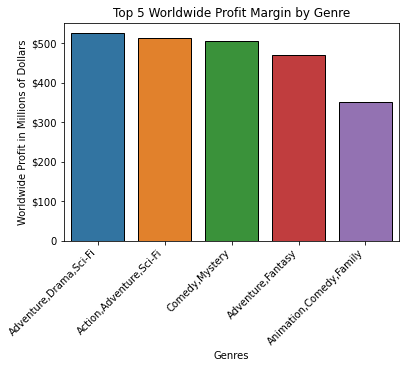

In [125]:
genres_roi = df_expanded_roi_top.index
wwroi = df_expanded_roi_top['worldwide_profit']

roi_barplot = sns.barplot(x = genres_roi, y = wwroi, edgecolor='black')
roi_barplot.set_xlabel('Genres')
roi_barplot.set_ylabel('Worldwide Profit in Millions of Dollars')
roi_barplot.set_title('Top 5 Worldwide Profit Margin by Genre')
roi_barplot.set_xticklabels(genres_roi, rotation=45, horizontalalignment='right')
roi_barplot.set_yticklabels(['0', '$100', '$200', '$300', '$400', '$500']);

### Top 5 Worldwide Percent Return on Investment by Genre

Generate a bar chart to illustrate how different categories of data compare to the same variable.<br>Specifically, demonstrate the worldwide eturn on investment in hundreds of millions of dollars by genre.

<ipython-input-126-411eebd2645e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  roip_barplot.set_yticklabels(['0%', '500%', '1000%', '1500%', '2000%', '2500%', '3000%', '3500%']);


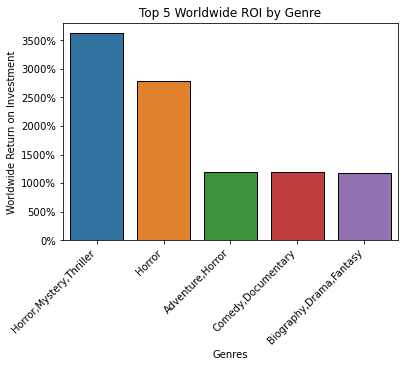

In [126]:
genres_roip = df_expanded_roi_perc_top.index
wwroip = df_expanded_roi_perc_top['worldwide_roi']

roip_barplot = sns.barplot(x = genres_roip, y = wwroip, edgecolor='black')
roip_barplot.set_xlabel('Genres')
roip_barplot.set_ylabel('Worldwide Return on Investment')
roip_barplot.set_title('Top 5 Worldwide ROI by Genre')
roip_barplot.set_xticklabels(genres_roip, rotation=45, horizontalalignment='right')
roip_barplot.set_yticklabels(['0%', '500%', '1000%', '1500%', '2000%', '2500%', '3000%', '3500%']);

### Visualization Exploration

The next several sections of code explore various visualizations of the above data<br>for their usefulness in research delivery.

<ipython-input-127-0d95ca202bde>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  roi_budgets.set_yticklabels(['$0', '$150', '$100', '$150', '$200'])
<ipython-input-127-0d95ca202bde>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  roip_budgets.set_yticklabels(['$0', '$150', '$100', '$150', '$200'])


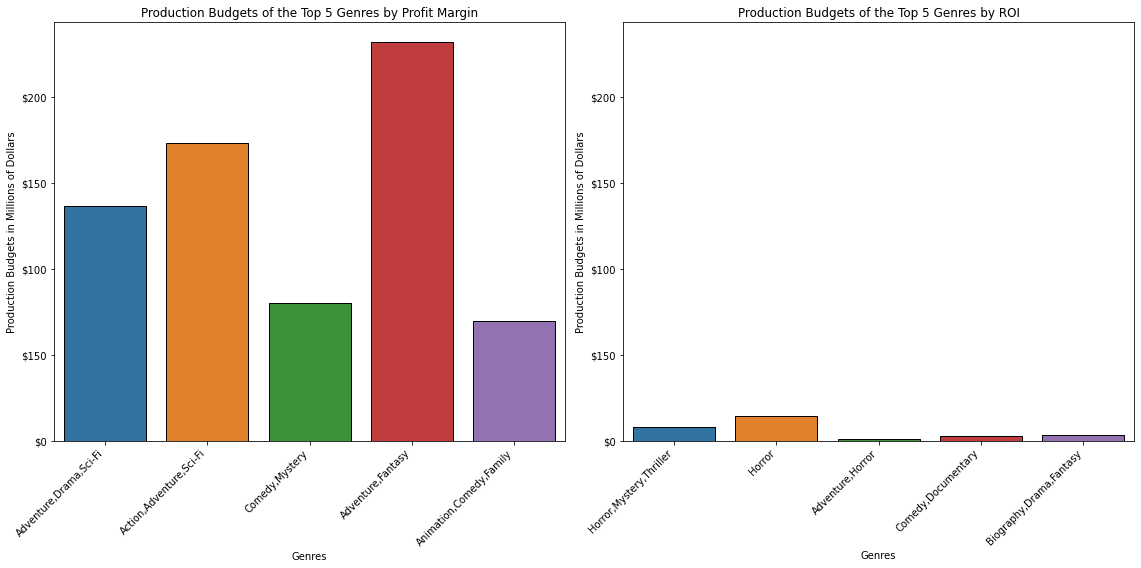

In [127]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

roi_budgets = sns.barplot(x=genres_roi, y=df_expanded_roi_top['production_budget'], ax=ax1, edgecolor='black')
roi_budgets.set_xlabel('Genres')
roi_budgets.set_ylabel('Production Budgets in Millions of Dollars')
roi_budgets.set_title('Production Budgets of the Top 5 Genres by Profit Margin')
roi_budgets.set_xticklabels(genres_roi, rotation=45, horizontalalignment='right')
roi_budgets.set_yticklabels(['$0', '$150', '$100', '$150', '$200'])
roi_budgets.tick_params(labelleft=True)

roip_budgets = sns.barplot(x=genres_roip, y=df_expanded_roi_perc_top['production_budget'], ax=ax2, edgecolor='black')
roip_budgets.set_xlabel('Genres')
roip_budgets.set_ylabel('Production Budgets in Millions of Dollars')
roip_budgets.set_title('Production Budgets of the Top 5 Genres by ROI')
roip_budgets.set_xticklabels(genres_roip, rotation=45, horizontalalignment='right')
roip_budgets.set_yticklabels(['$0', '$150', '$100', '$150', '$200'])
roip_budgets.tick_params(labelleft=True);

plt.tight_layout()

In [128]:
pal = sns.color_palette()
print(pal.as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


<ipython-input-129-d4c216329762>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  roip_budgets.set_yticklabels(['$0', '$150', '$100', '$150', '$200'])
<ipython-input-129-d4c216329762>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  roi_budgets.set_yticklabels(['$0', '$150', '$100', '$150', '$200'])
<ipython-input-129-d4c216329762>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  roip_barplot.set_yticklabels(['0', '$100', '$200', '$300', '$400', '$500'])
<ipython-input-129-d4c216329762>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  roi_barplot.set_yticklabels(['0', '$100', '$200', '$300', '$400', '$500'])
<ipython-input-129-d4c216329762>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  roip_barplot.set_yticklabels(['0%', '500%', '1000%', '1500%', '2000%', '2500%', '3000%', '3500%'])
<ipython-input-129-d4c216329762>:58: UserWa

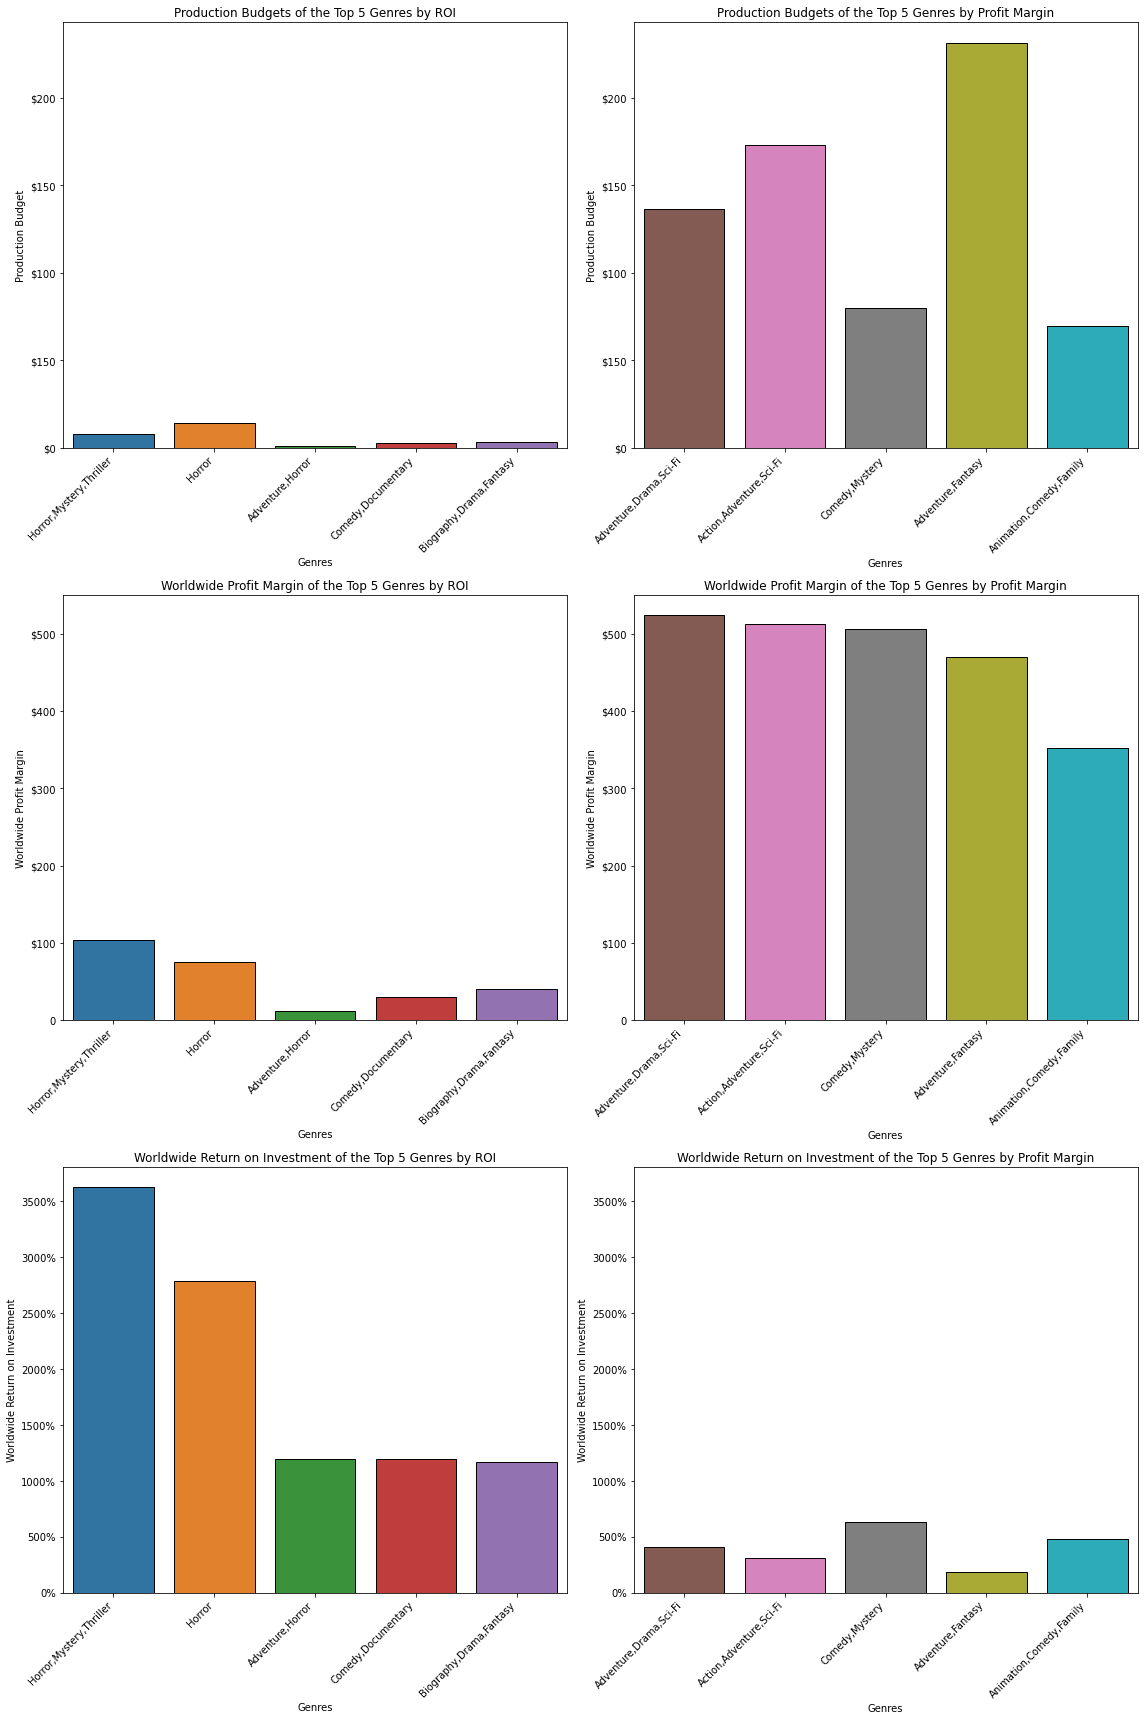

In [129]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16, 24), sharey='row')

genres_roip = df_expanded_roi_perc_top.index
wwroip = df_expanded_roi_perc_top['worldwide_roi']

genres_roi = df_expanded_roi_top.index
wwroi = df_expanded_roi_top['worldwide_profit']

palette_one = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
palette_two = ['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

roip_budgets = sns.barplot(x=genres_roip, y=df_expanded_roi_perc_top['production_budget'],
                           ax=ax1, palette=palette_one, edgecolor='black')
roip_budgets.set_xlabel('Genres')
roip_budgets.set_ylabel('Production Budget')
roip_budgets.set_title('Production Budgets of the Top 5 Genres by ROI')
roip_budgets.set_xticklabels(genres_roip, rotation=45, horizontalalignment='right')
roip_budgets.set_yticklabels(['$0', '$150', '$100', '$150', '$200'])

roi_budgets = sns.barplot(x=genres_roi, y=df_expanded_roi_top['production_budget'],
                          ax=ax2, palette=palette_two, edgecolor='black')
roi_budgets.set_xlabel('Genres')
roi_budgets.set_ylabel('Production Budget')
roi_budgets.set_title('Production Budgets of the Top 5 Genres by Profit Margin')
roi_budgets.set_xticklabels(genres_roi, rotation=45, horizontalalignment='right')
roi_budgets.set_yticklabels(['$0', '$150', '$100', '$150', '$200'])

roip_barplot = sns.barplot(x = genres_roip, y = df_expanded_roi_perc_top['worldwide_profit'],
                           ax=ax3, palette=palette_one, edgecolor='black')
roip_barplot.set_xlabel('Genres')
roip_barplot.set_ylabel('Worldwide Profit Margin')
roip_barplot.set_title('Worldwide Profit Margin of the Top 5 Genres by ROI')
roip_barplot.set_xticklabels(genres_roip, rotation=45, horizontalalignment='right')
roip_barplot.set_yticklabels(['0', '$100', '$200', '$300', '$400', '$500'])

roi_barplot = sns.barplot(x = genres_roi, y = wwroi,
                          ax=ax4, palette=palette_two, edgecolor='black')
roi_barplot.set_xlabel('Genres')
roi_barplot.set_ylabel('Worldwide Profit Margin')
roi_barplot.set_title('Worldwide Profit Margin of the Top 5 Genres by Profit Margin')
roi_barplot.set_xticklabels(genres_roi, rotation=45, horizontalalignment='right')
roi_barplot.set_yticklabels(['0', '$100', '$200', '$300', '$400', '$500'])

roip_barplot = sns.barplot(x = genres_roip, y = wwroip,
                           ax=ax5, palette=palette_one, edgecolor='black')
roip_barplot.set_xlabel('Genres')
roip_barplot.set_ylabel('Worldwide Return on Investment')
roip_barplot.set_title('Worldwide Return on Investment of the Top 5 Genres by ROI')
roip_barplot.set_xticklabels(genres_roip, rotation=45, horizontalalignment='right')
roip_barplot.set_yticklabels(['0%', '500%', '1000%', '1500%', '2000%', '2500%', '3000%', '3500%'])

roi_barplot = sns.barplot(x = genres_roi, y = df_expanded_roi_top['worldwide_roi'],
                          ax=ax6, palette=palette_two, edgecolor='black')
roi_barplot.set_xlabel('Genres')
roi_barplot.set_ylabel('Worldwide Return on Investment')
roi_barplot.set_title('Worldwide Return on Investment of the Top 5 Genres by Profit Margin')
roi_barplot.set_xticklabels(genres_roi, rotation=45, horizontalalignment='right')
roi_barplot.set_yticklabels(['0%', '500%', '1000%', '1500%', '2000%', '2500%', '3000%', '3500%'])

for axis in f.axes:
    axis.tick_params(labelleft=True)

plt.tight_layout();

Generate two final bar plots for use in the research slides.

<ipython-input-130-f423d3b30890>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  roip_barplot.set_yticklabels(['0%', '500%', '1000%', '1500%', '2000%', '2500%', '3000%', '3500%'])
<ipython-input-130-f423d3b30890>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  roi_barplot.set_yticklabels(['0%', '500%', '1000%', '1500%', '2000%', '2500%', '3000%', '3500%'])


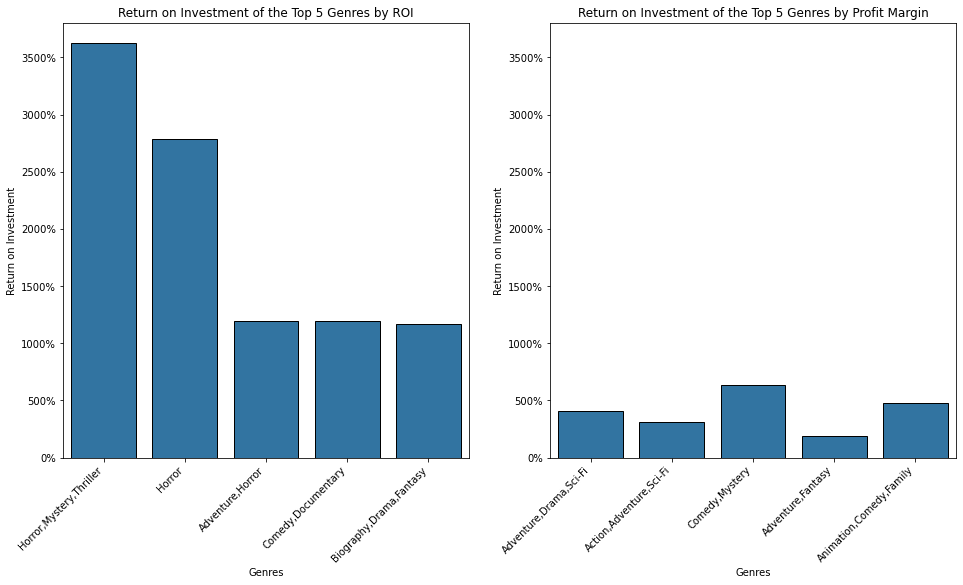

In [130]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey='row')

roip_barplot = sns.barplot(x = genres_roip, y = wwroip,
                           ax=ax1, color='tab:blue', edgecolor='black')
roip_barplot.set_xlabel('Genres')
roip_barplot.set_ylabel('Return on Investment')
roip_barplot.set_title('Return on Investment of the Top 5 Genres by ROI')
roip_barplot.set_xticklabels(genres_roip, rotation=45, horizontalalignment='right')
roip_barplot.set_yticklabels(['0%', '500%', '1000%', '1500%', '2000%', '2500%', '3000%', '3500%'])
roip_barplot.tick_params(labelleft=True)

roi_barplot = sns.barplot(x = genres_roi, y = df_expanded_roi_top['worldwide_roi'],
                          ax=ax2, color='tab:blue', edgecolor='black')
roi_barplot.set_xlabel('Genres')
roi_barplot.set_ylabel('Return on Investment')
roi_barplot.set_title('Return on Investment of the Top 5 Genres by Profit Margin')
roi_barplot.set_xticklabels(genres_roi, rotation=45, horizontalalignment='right')
roi_barplot.set_yticklabels(['0%', '500%', '1000%', '1500%', '2000%', '2500%', '3000%', '3500%'])
roi_barplot.tick_params(labelleft=True);

***
## Evaluation of Return on Investment

Ultimately, the primary takeaways from exploring the relationship between movie gross and production budget,<br>in terms of profit and return on investment, are these:
 - First: that the relationship between worldwide gross and production budget demonstrates a high margin of profit<br>for movies which combine the following genres together:
     - Adventure, Drama, and Sci-Fi
     - Action, Adventure, and Sci-Fi
     - Comedy and Mystery
<br>Within these collections of genres of movies, the average margin of profit is approximately 500 million dollars.<br>
 - Second: that the relationship between worldwide gross and production budget demonstrates a high return on investment<br>for movies which combine the following genres together:
     - Horror, Mystery, and Thriller
     - Horror
<br>Within these collections of genres of movies, the return on investment is<br>approximately 3622% for Horror, Mystery, and Thriller,<br>and approximately 2783% for Horror.

***
# Conclusions
With respect to the original propsed questions of this research, we found the following:
* Which genres of movies do audiences like?
    * The top-rated genres are **Documentary, Biography, and Music**
* Is there a relationship between ratings and revenue?
    * There is not a strong relationship, positive or negative, between ratings and revenue
* Which genres of movies have the highest domestic gross revenue?
    * The highest domestic-grossing genres are:
        * **Sci-Fi**
        * **Adventure**
        * **Animation**
        * **Action**
    * Additionally, the highest domestic-grossing genres as combinations are:
        * **Action/Adventure**
        * **Horror/Thriller**
* Which genres of movies have the highest return on investment?
    * The highest ROI genre combinations are:
        * **Horror/Mystery/Thriller**
        * **Horror**
* Are the highest grossing genres also the highest ROI genres?
    * Of the highest grossing genres, the ones that have the most amount of overlap with highest ROI are:
        * **Horror**
        * **Thriller**
***
Based on our research, we recommend that Microsoft's new film studio create movies that are either **Action/Adventure** movies or **Horror/Mystery/Thriller** movies, depending on the budget of the studio and the number of films made in a given period. If Microsoft has the capacity for high-budget films, **Action/Adventure** films will make more money with respect to profit margin. If Microsoft has the capacity to work on a high volume of films at once, **Horror** and **Thriller** films will yield a significantly higher return on investment, compared to **Action/Adventure** films, but with a lower profit margin per film. After a film in these genres is released, you can expect it to receive an average rating of **6/10** if it is an **Action** or **Adventure** film, and an average rating of **5/10** if it is a **Horror** film.

***
# Next Steps
Moving forward, it would be worth further investigating the relationship between a film's financial success and more of the various elements of its production, including:
* Director
* Producer
* Cast
* Advertising
* Product Delivery (Cinema versus Stream)
* Release Date
* Pre-existing Intellectual Property (IP)
* Runtime
* Merchandising